## 배경 자료

반도체 박막은 얇은 반도체 막으로 박막의 종류와 두께는 반도체 소자의 특성을 결정짓는 중요한 요소 중 하나입니다. 박막의 두께를 측정하는 방법으로 반사율 측정이 널리 사용되며 반사율은 입사광 세기에 대한 반사광 세기의 비율로 정해집니다. (반사율 = 반사광/입사광) 반사율은 빛의 파장에 따라 변하며 파장에 따른 반사율의 분포를 반사율 스펙트럼이라고 합니다. 



구조 설명

이번 대회에서 분석할 소자는 질화규소(layer_1)/이산화규소(layer_2)/질화규소(layer_3)/이산화규소(layer_4)/규소(기판) 총 5층 구조로 되어 있습니다. 대회의 목적은 기판인 규소를 제외한 layer_1 ~ layer_4의 두께를 예측하는 것으로 train.csv 파일에는 각 층의 두께와 반사율 스펙트럼이 포함되어 있습니다. 



데이터 설명

train.csv 파일에는 4층 박막의 두께와 파장에 따른 반사율 스펙트럼이 주어집니다. 헤더의 이름에 따라 layer_1 ~ 4는 해당 박막의 두께,

0~225은 빛의 파장에 해당하는 반사율이 됩니다. 헤더 이름인 0~225은 파장을 뜻하며 비식별화 처리가 되어있어 실제 값과는 다릅니다.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## data 확인

In [2]:
test_data = pd.read_csv('C:/Users/admin/Desktop/개별1/data/test.csv')

In [3]:
test_data

,id,0,1,2,3,4,5,6,7,8,...,216,217,218,219,220,221,222,223,224,225
0,0,0.535410,0.520775,0.494087,0.465134,0.430339,0.401751,0.355986,0.326427,0.282340,...,0.748339,0.757575,0.768130,0.777062,0.769173,0.768253,0.738704,0.739460,0.702139,0.702238
1,1,0.351099,0.398179,0.413809,0.418529,0.433257,0.455410,0.451065,0.464230,0.476011,...,0.333931,0.276307,0.211513,0.159223,0.110982,0.083130,0.099780,0.145420,0.260501,0.343857
2,2,0.490537,0.435958,0.413428,0.355796,0.335777,0.299944,0.242745,0.210555,0.180739,...,0.709371,0.746826,0.781436,0.788292,0.828630,0.835166,0.845859,0.846032,0.836724,0.846779
3,3,0.051634,0.075802,0.133983,0.154546,0.209387,0.251700,0.287552,0.333000,0.340617,...,0.075046,0.056651,0.079884,0.147469,0.213112,0.298096,0.382823,0.489381,0.562383,0.599247
4,4,0.154031,0.201728,0.270414,0.283799,0.343050,0.340233,0.379244,0.378511,0.373017,...,0.255070,0.242396,0.271287,0.328828,0.397950,0.486436,0.530573,0.582752,0.637296,0.637238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.199957,0.227188,0.250628,0.265388,0.291736,0.319845,0.339820,0.368420,0.373319,...,0.422622,0.410483,0.409814,0.420162,0.426533,0.445706,0.487397,0.495991,0.534095,0.549278
9996,9996,0.180469,0.142472,0.112432,0.084084,0.071504,0.068979,0.070754,0.063943,0.071106,...,0.745875,0.776221,0.767607,0.774457,0.805273,0.802651,0.810866,0.792099,0.796827,0.791949
9997,9997,0.169476,0.180695,0.225148,0.220553,0.262136,0.288092,0.280675,0.312065,0.304840,...,0.282820,0.296270,0.324376,0.391588,0.436017,0.500170,0.569207,0.623997,0.673445,0.688012
9998,9998,0.218762,0.204023,0.207701,0.198991,0.188334,0.173722,0.161461,0.155859,0.136998,...,0.650536,0.662007,0.688480,0.708460,0.722464,0.726888,0.758949,0.771153,0.769234,0.785455


In [4]:
train_data = pd.read_csv('C:/Users/admin/Desktop/개별1/data/train.csv')

In [5]:
train_data

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809995,300,300,300,260,0.349513,0.342661,0.326351,0.274503,0.253076,0.200509,...,0.534272,0.614797,0.696751,0.737556,0.794730,0.796240,0.833270,0.823509,0.836787,0.837526
809996,300,300,300,270,0.305650,0.295621,0.256275,0.220107,0.164272,0.116024,...,0.597710,0.678775,0.699154,0.747222,0.750222,0.778416,0.775639,0.751201,0.733458,0.702266
809997,300,300,300,280,0.256986,0.236297,0.185514,0.127390,0.098014,0.038709,...,0.665234,0.699309,0.700876,0.711074,0.722581,0.695186,0.656056,0.610674,0.509762,0.383782
809998,300,300,300,290,0.213730,0.177011,0.125791,0.080640,0.036302,0.007403,...,0.674421,0.688302,0.676385,0.636548,0.585522,0.532202,0.401940,0.259657,0.153737,0.129502


In [6]:
sample_data = pd.read_csv('C:/Users/admin/Desktop/개별1/data/sample_submission.csv')
sample_data

,id,layer_1,layer_2,layer_3,layer_4
0,0,0.0,0.0,0.0,0.0
1,1,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0
3,3,0.0,0.0,0.0,0.0
4,4,0.0,0.0,0.0,0.0
...,...,...,...,...,...
9995,9995,0.0,0.0,0.0,0.0
9996,9996,0.0,0.0,0.0,0.0
9997,9997,0.0,0.0,0.0,0.0
9998,9998,0.0,0.0,0.0,0.0


In [7]:
train_data['layer_1'].unique()
# 각 layer의 두께는 10~300까지 10의 단위로 구분되어있다. 총30가지

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120, 130,
       140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260,
       270, 280, 290, 300], dtype=int64)

In [8]:
# 각 layer 별 기초 통계량 # 의미 x
layer_df = train_data.iloc[:,:4]

In [9]:
layer_df.describe()

,layer_1,layer_2,layer_3,layer_4
count,810000.000000,810000.000000,810000.000000,810000.000000
mean,155.000000,155.000000,155.000000,155.000000
std,86.554468,86.554468,86.554468,86.554468
min,10.000000,10.000000,10.000000,10.000000
25%,80.000000,80.000000,80.000000,80.000000
50%,155.000000,155.000000,155.000000,155.000000
75%,230.000000,230.000000,230.000000,230.000000
max,300.000000,300.000000,300.000000,300.000000


In [10]:
# 파장 데이터 분석
wave_df = train_data.iloc[:,4:]

In [11]:
wave_df

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
0,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,0.246511,0.259407,0.260862,0.242524,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,0.191318,0.195369,0.200536,0.197588,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,0.157582,0.158885,0.156911,0.166162,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,0.126962,0.134453,0.106717,0.127309,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,0.097895,0.086765,0.078676,0.075729,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809995,0.349513,0.342661,0.326351,0.274503,0.253076,0.200509,0.159043,0.094644,0.074915,0.054888,...,0.534272,0.614797,0.696751,0.737556,0.794730,0.796240,0.833270,0.823509,0.836787,0.837526
809996,0.305650,0.295621,0.256275,0.220107,0.164272,0.116024,0.078614,0.041309,0.043083,0.037534,...,0.597710,0.678775,0.699154,0.747222,0.750222,0.778416,0.775639,0.751201,0.733458,0.702266
809997,0.256986,0.236297,0.185514,0.127390,0.098014,0.038709,0.032116,0.014756,0.064815,0.103352,...,0.665234,0.699309,0.700876,0.711074,0.722581,0.695186,0.656056,0.610674,0.509762,0.383782
809998,0.213730,0.177011,0.125791,0.080640,0.036302,0.007403,0.035937,0.043684,0.110988,0.178333,...,0.674421,0.688302,0.676385,0.636548,0.585522,0.532202,0.401940,0.259657,0.153737,0.129502


In [12]:
wave_df[wave_df['0'] < 0]

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
122,-0.013099,0.005278,0.009720,0.003623,0.006219,-0.010141,-0.011285,-0.002984,0.006275,0.013926,...,0.536320,0.556260,0.551790,0.567059,0.551263,0.563255,0.540282,0.548955,0.553797,0.553365
179,-0.010384,0.018613,0.030685,0.037414,0.043115,0.070660,0.062683,0.095774,0.115306,0.122839,...,0.480941,0.486617,0.485046,0.472918,0.471021,0.464525,0.448226,0.446798,0.427340,0.420545
180,-0.004806,0.003933,0.008571,0.005680,0.000054,-0.009732,0.004638,-0.001376,-0.011040,0.014363,...,0.299485,0.318808,0.326698,0.311787,0.345125,0.351284,0.337029,0.341972,0.361033,0.356849
207,-0.008112,-0.002771,-0.010918,0.001330,0.019945,0.001091,0.028428,0.041822,0.053145,0.072964,...,0.580756,0.586429,0.577868,0.542813,0.531812,0.527798,0.495632,0.473287,0.460244,0.422509
237,-0.001316,0.004139,0.021889,0.032283,0.040936,0.040903,0.050441,0.070911,0.093413,0.124794,...,0.440185,0.428091,0.402763,0.383427,0.359561,0.337162,0.307733,0.269867,0.278071,0.259743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809489,-0.003553,-0.005639,0.009162,0.060335,0.088002,0.171670,0.220557,0.292502,0.357507,0.401765,...,0.414973,0.501514,0.588296,0.680051,0.715195,0.761689,0.804768,0.808109,0.810141,0.833357
809520,-0.000393,-0.002219,0.025414,0.032797,0.062924,0.104512,0.141484,0.150528,0.207871,0.246115,...,0.733252,0.730083,0.750518,0.751450,0.766044,0.756701,0.724985,0.705505,0.682866,0.646965
809550,-0.001797,0.033532,0.052750,0.087837,0.118199,0.154762,0.211502,0.252299,0.290644,0.308986,...,0.715337,0.701277,0.686100,0.653073,0.627871,0.561267,0.515428,0.419785,0.336250,0.250116
809635,-0.002649,0.020450,0.032888,0.084578,0.148504,0.208949,0.245902,0.305456,0.357804,0.393361,...,0.765418,0.779700,0.785595,0.811248,0.799255,0.818287,0.806794,0.770156,0.740662,0.721938


In [13]:
wave_df.iloc[178:182,:]

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
178,0.013877,0.000034,-0.009641,0.017019,0.022096,0.008390,0.010547,0.024691,0.049211,0.053650,...,0.567374,0.554092,0.560982,0.536743,0.552933,0.528043,0.503746,0.508846,0.487302,0.483504
179,-0.010384,0.018613,0.030685,0.037414,0.043115,0.070660,0.062683,0.095774,0.115306,0.122839,...,0.480941,0.486617,0.485046,0.472918,0.471021,0.464525,0.448226,0.446798,0.427340,0.420545
180,-0.004806,0.003933,0.008571,0.005680,0.000054,-0.009732,0.004638,-0.001376,-0.011040,0.014363,...,0.299485,0.318808,0.326698,0.311787,0.345125,0.351284,0.337029,0.341972,0.361033,0.356849
181,0.013827,-0.001115,0.013781,0.023592,0.025890,0.004724,0.020040,0.015434,0.011422,0.040283,...,0.436197,0.443191,0.452465,0.473115,0.497998,0.496003,0.517871,0.524338,0.551401,0.563460


## EDA

In [14]:
# 결측치확인
isna = wave_df.isnull().sum()
isna[isna>0] # 결측치는 없는 것으로 확인.

Series([], dtype: int64)

In [15]:
wave_0_df = wave_df.iloc[:,0:1]

In [16]:
# 0번째 파장 분석
wave_0_df 

,0
0,0.254551
1,0.205062
2,0.189196
3,0.131003
4,0.091033
...,...
809995,0.349513
809996,0.305650
809997,0.256986
809998,0.213730


C:\Users\admin\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


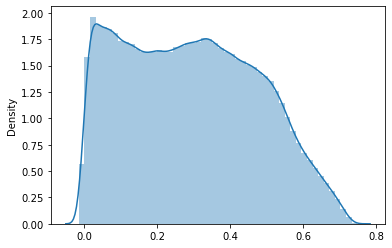

In [17]:
#histogram
sns.distplot(wave_0_df, kde=True) 
plt.show()
## 0번째 파장은 0에서 0.8까지의 파장을 가진다. 

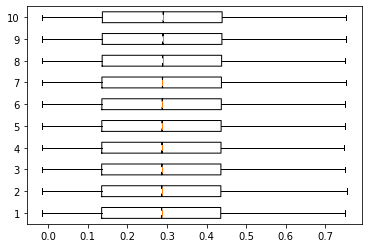

In [18]:
# boxplot
# 이상치 확인
plt.boxplot(wave_df.iloc[:,0:10],
            notch=1, 

            sym='rs', 

            vert=0 

           )

plt.show()

In [19]:
wave_df.describe()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,...,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000
mean,0.292653,0.292893,0.293125,0.293363,0.293666,0.293994,0.294344,0.294792,0.295325,0.295757,...,0.600336,0.606206,0.612238,0.618456,0.623942,0.625395,0.627100,0.628997,0.631166,0.633594
std,0.181642,0.181857,0.182055,0.182197,0.182361,0.182529,0.182693,0.182858,0.183057,0.183192,...,0.199727,0.198644,0.197473,0.196177,0.195028,0.194909,0.194730,0.194493,0.194146,0.193725
min,-0.014902,-0.014798,-0.014897,-0.014709,-0.014903,-0.014662,-0.014924,-0.014789,-0.014775,-0.014945,...,-0.011992,-0.008661,-0.011430,-0.009827,-0.007632,-0.007411,-0.007073,-0.007101,-0.005519,-0.006074
25%,0.135139,0.135180,0.135258,0.135478,0.135585,0.135705,0.135858,0.136423,0.136704,0.136993,...,0.469345,0.476970,0.484727,0.492739,0.500232,0.501650,0.503811,0.506252,0.509036,0.512067
50%,0.286510,0.286874,0.287194,0.287553,0.287830,0.288151,0.288705,0.289222,0.289905,0.290652,...,0.643685,0.649886,0.656258,0.662860,0.668727,0.670287,0.672145,0.674283,0.676692,0.679339
75%,0.435696,0.435956,0.436112,0.436326,0.436634,0.437142,0.437395,0.437924,0.438657,0.439172,...,0.760737,0.765462,0.770333,0.775263,0.779555,0.780846,0.782387,0.783979,0.785774,0.787759
max,0.748205,0.753103,0.749494,0.747389,0.748827,0.750392,0.751105,0.749795,0.751538,0.750883,...,0.935423,0.934867,0.938873,0.937817,0.942214,0.940367,0.940387,0.941548,0.942411,0.943648


In [20]:
train_data.head()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781


In [21]:
# layer 별로, 두께 별로 반사율을 평균으로 group by
# layer_1 분석
layer1_aly = train_data.drop(['layer_2','layer_3','layer_4'],axis = 1)

In [22]:
layer1_aly

,layer_1,0,1,2,3,4,5,6,7,8,...,216,217,218,219,220,221,222,223,224,225
0,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,0.246511,0.259407,0.260862,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,0.191318,0.195369,0.200536,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,0.157582,0.158885,0.156911,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,0.126962,0.134453,0.106717,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,0.097895,0.086765,0.078676,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809995,300,0.349513,0.342661,0.326351,0.274503,0.253076,0.200509,0.159043,0.094644,0.074915,...,0.534272,0.614797,0.696751,0.737556,0.794730,0.796240,0.833270,0.823509,0.836787,0.837526
809996,300,0.305650,0.295621,0.256275,0.220107,0.164272,0.116024,0.078614,0.041309,0.043083,...,0.597710,0.678775,0.699154,0.747222,0.750222,0.778416,0.775639,0.751201,0.733458,0.702266
809997,300,0.256986,0.236297,0.185514,0.127390,0.098014,0.038709,0.032116,0.014756,0.064815,...,0.665234,0.699309,0.700876,0.711074,0.722581,0.695186,0.656056,0.610674,0.509762,0.383782
809998,300,0.213730,0.177011,0.125791,0.080640,0.036302,0.007403,0.035937,0.043684,0.110988,...,0.674421,0.688302,0.676385,0.636548,0.585522,0.532202,0.401940,0.259657,0.153737,0.129502


In [23]:
#layer 1에 대해 두께 별로 각 파장의 평균을 이용해서 group by
layer1_aly_mean = layer1_aly.groupby('layer_1').agg('mean')
layer1_aly_mean

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
layer_1,,,,,,,,,,,,,,,,,,,,,
10,0.235445,0.235704,0.235760,0.235902,0.236068,0.236278,0.236528,0.236722,0.237170,0.237520,...,0.584542,0.590948,0.597455,0.604082,0.610002,0.611474,0.613349,0.615339,0.617666,0.620359
20,0.244268,0.244486,0.244490,0.244654,0.244835,0.244967,0.245203,0.245433,0.245785,0.246013,...,0.608131,0.613903,0.619749,0.625857,0.631198,0.632584,0.634421,0.636297,0.638500,0.640889
30,0.257980,0.258073,0.258292,0.258369,0.258518,0.258748,0.258881,0.259243,0.259681,0.259994,...,0.624160,0.629404,0.634701,0.640343,0.645329,0.646682,0.648273,0.649987,0.651973,0.654331
40,0.274421,0.274604,0.274882,0.275071,0.275263,0.275498,0.275808,0.276241,0.276693,0.277083,...,0.622122,0.627220,0.632509,0.637987,0.642863,0.643956,0.645377,0.647059,0.648747,0.651042
50,0.292036,0.292293,0.292454,0.292815,0.293173,0.293405,0.293730,0.294250,0.294816,0.295265,...,0.603389,0.608725,0.614203,0.620082,0.625175,0.626232,0.627653,0.629224,0.631003,0.633199
60,0.308751,0.309047,0.309153,0.309508,0.309784,0.310203,0.310646,0.311093,0.311694,0.312301,...,0.580214,0.586278,0.592553,0.599047,0.604877,0.606055,0.607543,0.609424,0.611406,0.613857
70,0.323299,0.323447,0.323753,0.323910,0.324259,0.324493,0.324922,0.325394,0.325986,0.326506,...,0.573422,0.580018,0.587011,0.594041,0.600337,0.602059,0.604069,0.606327,0.608881,0.611807
80,0.334547,0.334476,0.334723,0.334801,0.334966,0.335171,0.335589,0.335962,0.336457,0.336989,...,0.589367,0.596167,0.602934,0.609958,0.616199,0.618250,0.620508,0.623091,0.625722,0.628694
90,0.341671,0.341542,0.341412,0.341355,0.341373,0.341482,0.341657,0.341828,0.342135,0.342543,...,0.612932,0.619011,0.625068,0.631393,0.637014,0.638789,0.640829,0.643037,0.645439,0.648074


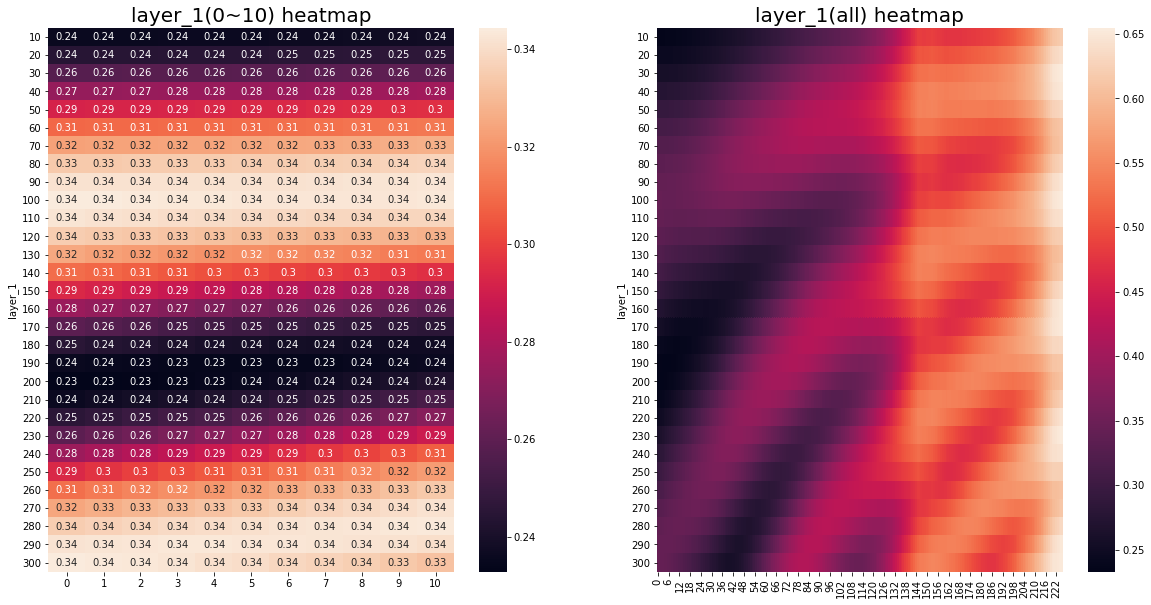

In [24]:
# 파장이 140 기점으로 반사율이 급격하게 달라짐
# 물질의 화학적 특성으로 인해 빛의 파장이 특정 값 이상 또는 이하로 변경될 때 큰 차이가 발생하는 것으로 판단
# 음수 이상치 대체에서 두께별 평균값 사용 불가능 -> 시계열데이터 보간법 사용 결정

plt.figure(figsize=(20,10))

plt.subplot(121)
sns.heatmap(layer1_aly_mean.iloc[:,0:11], annot=True) # , ax=ax)
plt.title('layer_1(0~10) heatmap', fontsize=20)

plt.subplot(122)
sns.heatmap(layer1_aly_mean) # , ax=ax)
plt.title('layer_1(all) heatmap', fontsize=20)

plt.show()

In [25]:
layer2_aly = train_data.drop(['layer_1','layer_3','layer_4'],axis = 1)
layer2_aly_mean = layer2_aly.groupby('layer_2').agg('mean')
layer3_aly = train_data.drop(['layer_1','layer_2','layer_4'],axis = 1)
layer3_aly_mean = layer3_aly.groupby('layer_3').agg('mean')
layer4_aly = train_data.drop(['layer_1','layer_3','layer_2'],axis = 1)
layer4_aly_mean = layer4_aly.groupby('layer_4').agg('mean')

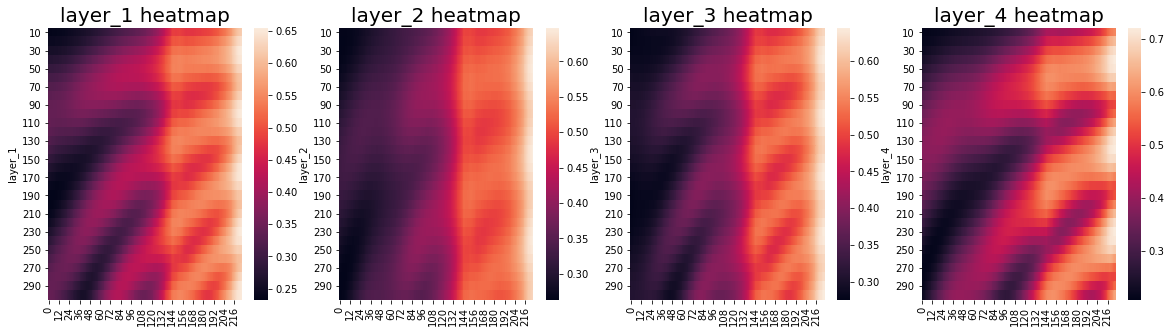

In [26]:
# layer2,3,4 또한 동일

plt.figure(figsize=(20,5))

plt.subplot(141)
sns.heatmap(layer1_aly_mean) # , ax=ax)
plt.title('layer_1 heatmap', fontsize=20)

plt.subplot(142)
sns.heatmap(layer2_aly_mean) # , ax=ax)
plt.title('layer_2 heatmap', fontsize=20)

plt.subplot(143)
sns.heatmap(layer3_aly_mean) # , ax=ax)
plt.title('layer_3 heatmap', fontsize=20)

plt.subplot(144)
sns.heatmap(layer4_aly_mean) # , ax=ax)
plt.title('layer_4 heatmap', fontsize=20)

plt.show()

# 두께가 약 60을 범위로 반사율이 증가/감소를 반복하는 규칙성이 있으나 -> 두께에 따른 반사율의 선형성 없음 -> 가설 X

# 가설 검증용 해석 필요 : 추후에 공부 후 채울 예정
# layer1의 경우 두께가 0~100의 범위일 때, 두께가 얇으면 투과율이 높아서 반사율이 상대적으로 낮고, 두께가 크면 반사율이 높다
# 그러나 100 이상으로 두꺼워질 경우 다시 반사율이 낮아진다?

In [27]:
# 이상치 대체

wave_df_na = wave_df[wave_df > 0]  # 이상치 NA로 변환
ts_wave_df = wave_df_na.interpolate()  # 시계열데이터 값에 선형으로 비례하는 방식으로 결측값 보간

In [28]:
ts_wave_df

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
0,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,0.246511,0.259407,0.260862,0.242524,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,0.191318,0.195369,0.200536,0.197588,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,0.157582,0.158885,0.156911,0.166162,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,0.126962,0.134453,0.106717,0.127309,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,0.097895,0.086765,0.078676,0.075729,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809995,0.349513,0.342661,0.326351,0.274503,0.253076,0.200509,0.159043,0.094644,0.074915,0.054888,...,0.534272,0.614797,0.696751,0.737556,0.794730,0.796240,0.833270,0.823509,0.836787,0.837526
809996,0.305650,0.295621,0.256275,0.220107,0.164272,0.116024,0.078614,0.041309,0.043083,0.037534,...,0.597710,0.678775,0.699154,0.747222,0.750222,0.778416,0.775639,0.751201,0.733458,0.702266
809997,0.256986,0.236297,0.185514,0.127390,0.098014,0.038709,0.032116,0.014756,0.064815,0.103352,...,0.665234,0.699309,0.700876,0.711074,0.722581,0.695186,0.656056,0.610674,0.509762,0.383782
809998,0.213730,0.177011,0.125791,0.080640,0.036302,0.007403,0.035937,0.043684,0.110988,0.178333,...,0.674421,0.688302,0.676385,0.636548,0.585522,0.532202,0.401940,0.259657,0.153737,0.129502


In [29]:
# 이상치 대체 후 최종 train_data

In [30]:
train_data2 = pd.concat([train_data.iloc[:,0:4],ts_wave_df],axis=1)
train_data2

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809995,300,300,300,260,0.349513,0.342661,0.326351,0.274503,0.253076,0.200509,...,0.534272,0.614797,0.696751,0.737556,0.794730,0.796240,0.833270,0.823509,0.836787,0.837526
809996,300,300,300,270,0.305650,0.295621,0.256275,0.220107,0.164272,0.116024,...,0.597710,0.678775,0.699154,0.747222,0.750222,0.778416,0.775639,0.751201,0.733458,0.702266
809997,300,300,300,280,0.256986,0.236297,0.185514,0.127390,0.098014,0.038709,...,0.665234,0.699309,0.700876,0.711074,0.722581,0.695186,0.656056,0.610674,0.509762,0.383782
809998,300,300,300,290,0.213730,0.177011,0.125791,0.080640,0.036302,0.007403,...,0.674421,0.688302,0.676385,0.636548,0.585522,0.532202,0.401940,0.259657,0.153737,0.129502


In [31]:
# 이상치 대체 후 표준편차 작아짐 -> 정확도 향상

In [32]:
train_data2.describe()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,8.100000e+05,8.100000e+05,810000.000000,8.100000e+05,8.100000e+05,8.100000e+05,...,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000
mean,155.000000,155.000000,155.000000,155.000000,2.928863e-01,2.931288e-01,0.293371,2.936075e-01,2.939187e-01,2.942507e-01,...,0.600396,0.606240,0.612281,0.618481,0.623957,0.625415,0.627113,0.629012,0.631182,0.633604
std,86.554468,86.554468,86.554468,86.554468,1.812821e-01,1.814929e-01,0.181676,1.818204e-01,1.819722e-01,1.821342e-01,...,0.199619,0.198583,0.197397,0.196132,0.195001,0.194873,0.194706,0.194465,0.194117,0.193707
min,10.000000,10.000000,10.000000,10.000000,6.880649e-07,4.090144e-09,0.000001,7.470325e-07,3.039314e-07,4.301170e-07,...,0.000094,0.000029,0.000023,0.000059,0.000404,0.000072,0.000046,0.000699,0.000180,0.000027
25%,80.000000,80.000000,80.000000,80.000000,1.351537e-01,1.351936e-01,0.135276,1.354914e-01,1.356111e-01,1.357174e-01,...,0.469443,0.477028,0.484826,0.492778,0.500258,0.501685,0.503833,0.506276,0.509066,0.512077
50%,155.000000,155.000000,155.000000,155.000000,2.865101e-01,2.868739e-01,0.287194,2.875533e-01,2.878298e-01,2.881510e-01,...,0.643685,0.649886,0.656258,0.662860,0.668727,0.670287,0.672145,0.674283,0.676692,0.679339
75%,230.000000,230.000000,230.000000,230.000000,4.356964e-01,4.359565e-01,0.436112,4.363260e-01,4.366339e-01,4.371424e-01,...,0.760737,0.765462,0.770333,0.775263,0.779555,0.780846,0.782387,0.783979,0.785774,0.787759
max,300.000000,300.000000,300.000000,300.000000,7.482049e-01,7.531032e-01,0.749494,7.473885e-01,7.488266e-01,7.503917e-01,...,0.935423,0.934867,0.938873,0.937817,0.942214,0.940367,0.940387,0.941548,0.942411,0.943648


In [33]:
train_data.describe()

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
count,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,...,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000,810000.000000
mean,155.000000,155.000000,155.000000,155.000000,0.292653,0.292893,0.293125,0.293363,0.293666,0.293994,...,0.600336,0.606206,0.612238,0.618456,0.623942,0.625395,0.627100,0.628997,0.631166,0.633594
std,86.554468,86.554468,86.554468,86.554468,0.181642,0.181857,0.182055,0.182197,0.182361,0.182529,...,0.199727,0.198644,0.197473,0.196177,0.195028,0.194909,0.194730,0.194493,0.194146,0.193725
min,10.000000,10.000000,10.000000,10.000000,-0.014902,-0.014798,-0.014897,-0.014709,-0.014903,-0.014662,...,-0.011992,-0.008661,-0.011430,-0.009827,-0.007632,-0.007411,-0.007073,-0.007101,-0.005519,-0.006074
25%,80.000000,80.000000,80.000000,80.000000,0.135139,0.135180,0.135258,0.135478,0.135585,0.135705,...,0.469345,0.476970,0.484727,0.492739,0.500232,0.501650,0.503811,0.506252,0.509036,0.512067
50%,155.000000,155.000000,155.000000,155.000000,0.286510,0.286874,0.287194,0.287553,0.287830,0.288151,...,0.643685,0.649886,0.656258,0.662860,0.668727,0.670287,0.672145,0.674283,0.676692,0.679339
75%,230.000000,230.000000,230.000000,230.000000,0.435696,0.435956,0.436112,0.436326,0.436634,0.437142,...,0.760737,0.765462,0.770333,0.775263,0.779555,0.780846,0.782387,0.783979,0.785774,0.787759
max,300.000000,300.000000,300.000000,300.000000,0.748205,0.753103,0.749494,0.747389,0.748827,0.750392,...,0.935423,0.934867,0.938873,0.937817,0.942214,0.940367,0.940387,0.941548,0.942411,0.943648


In [34]:
# 이상치 대체 후 layer_1 두께 별로 반사율을 평균으로 group by

ts_layer1_aly = pd.concat([layer1_aly.iloc[:,0:1],ts_wave_df],axis=1)
ts_layer1_aly_mean = ts_layer1_aly.groupby('layer_1').agg('mean')
ts_layer1_aly_mean.head()

,0,1,2,3,4,5,6,7,8,9,...,216,217,218,219,220,221,222,223,224,225
layer_1,,,,,,,,,,,,,,,,,,,,,
10,0.235689,0.235939,0.236019,0.236152,0.236344,0.236536,0.236768,0.237035,0.237459,0.237809,...,0.584542,0.590948,0.597455,0.604082,0.610002,0.611474,0.613349,0.615339,0.617666,0.620359
20,0.244491,0.244728,0.244747,0.244930,0.245092,0.245237,0.245478,0.245748,0.246068,0.246296,...,0.608148,0.613903,0.619749,0.625857,0.631198,0.632584,0.634421,0.636297,0.638500,0.640889
30,0.258223,0.258322,0.258549,0.258597,0.258775,0.258974,0.259116,0.259488,0.259946,0.260251,...,0.624364,0.629535,0.634855,0.640382,0.645387,0.646782,0.648335,0.650008,0.652015,0.654373
40,0.274634,0.274815,0.275150,0.275320,0.275534,0.275745,0.276061,0.276493,0.276969,0.277351,...,0.622249,0.627313,0.632622,0.638027,0.642922,0.644015,0.645396,0.647059,0.648747,0.651063
50,0.292306,0.292549,0.292708,0.293067,0.293436,0.293643,0.293978,0.294545,0.295084,0.295566,...,0.603389,0.608725,0.614203,0.620082,0.625175,0.626232,0.627653,0.629224,0.631003,0.633199


In [35]:
# test_data 음수 이상치 보간

test_wave_df = test_data.iloc[:,1:]
test_wave_df_na = test_wave_df[test_wave_df > 0]  
test_ts_wave_df = test_wave_df_na.interpolate()  
test_data2 = pd.concat([test_data.iloc[:,0:1],test_ts_wave_df],axis=1)
test_data2.head()

,id,0,1,2,3,4,5,6,7,8,...,216,217,218,219,220,221,222,223,224,225
0,0,0.535410,0.520775,0.494087,0.465134,0.430339,0.401751,0.355986,0.326427,0.282340,...,0.748339,0.757575,0.768130,0.777062,0.769173,0.768253,0.738704,0.739460,0.702139,0.702238
1,1,0.351099,0.398179,0.413809,0.418529,0.433257,0.455410,0.451065,0.464230,0.476011,...,0.333931,0.276307,0.211513,0.159223,0.110982,0.083130,0.099780,0.145420,0.260501,0.343857
2,2,0.490537,0.435958,0.413428,0.355796,0.335777,0.299944,0.242745,0.210555,0.180739,...,0.709371,0.746826,0.781436,0.788292,0.828630,0.835166,0.845859,0.846032,0.836724,0.846779
3,3,0.051634,0.075802,0.133983,0.154546,0.209387,0.251700,0.287552,0.333000,0.340617,...,0.075046,0.056651,0.079884,0.147469,0.213112,0.298096,0.382823,0.489381,0.562383,0.599247
4,4,0.154031,0.201728,0.270414,0.283799,0.343050,0.340233,0.379244,0.378511,0.373017,...,0.255070,0.242396,0.271287,0.328828,0.397950,0.486436,0.530573,0.582752,0.637296,0.637238


## 최종 데이터 파일 csv 저장

In [152]:
test_data2.to_csv('C:/Users/admin/Desktop/개별1/data/test2.csv', index=False)

In [153]:
test_data3 = pd.read_csv('C:/Users/admin/Desktop/개별1/data/test2.csv')
test_data3

,id,0,1,2,3,4,5,6,7,8,...,216,217,218,219,220,221,222,223,224,225
0,0,0.535410,0.520775,0.494087,0.465134,0.430339,0.401751,0.355986,0.326427,0.282340,...,0.748339,0.757575,0.768130,0.777062,0.769173,0.768253,0.738704,0.739460,0.702139,0.702238
1,1,0.351099,0.398179,0.413809,0.418529,0.433257,0.455410,0.451065,0.464230,0.476011,...,0.333931,0.276307,0.211513,0.159223,0.110982,0.083130,0.099780,0.145420,0.260501,0.343857
2,2,0.490537,0.435958,0.413428,0.355796,0.335777,0.299944,0.242745,0.210555,0.180739,...,0.709371,0.746826,0.781436,0.788292,0.828630,0.835166,0.845859,0.846032,0.836724,0.846779
3,3,0.051634,0.075802,0.133983,0.154546,0.209387,0.251700,0.287552,0.333000,0.340617,...,0.075046,0.056651,0.079884,0.147469,0.213112,0.298096,0.382823,0.489381,0.562383,0.599247
4,4,0.154031,0.201728,0.270414,0.283799,0.343050,0.340233,0.379244,0.378511,0.373017,...,0.255070,0.242396,0.271287,0.328828,0.397950,0.486436,0.530573,0.582752,0.637296,0.637238
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995,0.199957,0.227188,0.250628,0.265388,0.291736,0.319845,0.339820,0.368420,0.373319,...,0.422622,0.410483,0.409814,0.420162,0.426533,0.445706,0.487397,0.495991,0.534095,0.549278
9996,9996,0.180469,0.142472,0.112432,0.084084,0.071504,0.068979,0.070754,0.063943,0.071106,...,0.745875,0.776221,0.767607,0.774457,0.805273,0.802651,0.810866,0.792099,0.796827,0.791949
9997,9997,0.169476,0.180695,0.225148,0.220553,0.262136,0.288092,0.280675,0.312065,0.304840,...,0.282820,0.296270,0.324376,0.391588,0.436017,0.500170,0.569207,0.623997,0.673445,0.688012
9998,9998,0.218762,0.204023,0.207701,0.198991,0.188334,0.173722,0.161461,0.155859,0.136998,...,0.650536,0.662007,0.688480,0.708460,0.722464,0.726888,0.758949,0.771153,0.769234,0.785455


In [154]:
train_data2.to_csv('C:/Users/admin/Desktop/개별1/data/train2.csv', index=False)

In [156]:
train_data3 = pd.read_csv('C:/Users/admin/Desktop/개별1/data/train2.csv')
train_data3

,layer_1,layer_2,layer_3,layer_4,0,1,2,3,4,5,...,216,217,218,219,220,221,222,223,224,225
0,10,10,10,10,0.254551,0.258823,0.254659,0.252085,0.247678,0.253614,...,0.354750,0.369223,0.388184,0.408496,0.414564,0.429403,0.419225,0.443250,0.433414,0.465502
1,10,10,10,20,0.205062,0.225544,0.217758,0.202169,0.199633,0.207380,...,0.557203,0.573656,0.587998,0.612754,0.627825,0.633393,0.637706,0.625981,0.653231,0.637853
2,10,10,10,30,0.189196,0.165869,0.177655,0.156822,0.175094,0.177755,...,0.699864,0.708688,0.721982,0.713464,0.743030,0.741709,0.747743,0.746037,0.737356,0.750391
3,10,10,10,40,0.131003,0.120076,0.138975,0.117931,0.130566,0.131262,...,0.764786,0.763788,0.770017,0.787571,0.778866,0.776969,0.774712,0.801526,0.805305,0.784057
4,10,10,10,50,0.091033,0.086893,0.108125,0.080405,0.105917,0.077083,...,0.786677,0.802271,0.806557,0.799614,0.789333,0.804087,0.787763,0.794948,0.819105,0.801781
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809995,300,300,300,260,0.349513,0.342661,0.326351,0.274503,0.253076,0.200509,...,0.534272,0.614797,0.696751,0.737556,0.794730,0.796240,0.833270,0.823509,0.836787,0.837526
809996,300,300,300,270,0.305650,0.295621,0.256275,0.220107,0.164272,0.116024,...,0.597710,0.678775,0.699154,0.747222,0.750222,0.778416,0.775639,0.751201,0.733458,0.702266
809997,300,300,300,280,0.256986,0.236297,0.185514,0.127390,0.098014,0.038709,...,0.665234,0.699309,0.700876,0.711074,0.722581,0.695186,0.656056,0.610674,0.509762,0.383782
809998,300,300,300,290,0.213730,0.177011,0.125791,0.080640,0.036302,0.007403,...,0.674421,0.688302,0.676385,0.636548,0.585522,0.532202,0.401940,0.259657,0.153737,0.129502


## 변수 상관계수 분석

In [6]:
train_X1 = train_data.iloc[:,5:15]
train_X1

,1,2,3,4,5,6,7,8,9,10
0,0.258823,0.254659,0.252085,0.247678,0.253614,0.246511,0.259407,0.260862,0.242524,0.253870
1,0.225544,0.217758,0.202169,0.199633,0.207380,0.191318,0.195369,0.200536,0.197588,0.198726
2,0.165869,0.177655,0.156822,0.175094,0.177755,0.157582,0.158885,0.156911,0.166162,0.148831
3,0.120076,0.138975,0.117931,0.130566,0.131262,0.126962,0.134453,0.106717,0.127309,0.099958
4,0.086893,0.108125,0.080405,0.105917,0.077083,0.097895,0.086765,0.078676,0.075729,0.086023
...,...,...,...,...,...,...,...,...,...,...
809995,0.342661,0.326351,0.274503,0.253076,0.200509,0.159043,0.094644,0.074915,0.054888,0.055714
809996,0.295621,0.256275,0.220107,0.164272,0.116024,0.078614,0.041309,0.043083,0.037534,0.079834
809997,0.236297,0.185514,0.127390,0.098014,0.038709,0.032116,0.014756,0.064815,0.103352,0.177947
809998,0.177011,0.125791,0.080640,0.036302,0.007403,0.035937,0.043684,0.110988,0.178333,0.265601


In [7]:
train_X1.corr()

,1,2,3,4,5,6,7,8,9,10
1,1.000000,0.990166,0.967694,0.931094,0.881559,0.820251,0.749180,0.670449,0.586184,0.498582
2,0.990166,1.000000,0.990156,0.967686,0.931092,0.881242,0.819776,0.748604,0.669768,0.585438
3,0.967694,0.990156,1.000000,0.990167,0.967729,0.930903,0.880923,0.819352,0.748073,0.669148
4,0.931094,0.967686,0.990167,1.000000,0.990181,0.967570,0.930617,0.880506,0.818822,0.747433
5,0.881559,0.931092,0.967729,0.990181,1.000000,0.990095,0.967362,0.930266,0.880022,0.818198
6,0.820251,0.881242,0.930903,0.967570,0.990095,1.000000,0.990086,0.967307,0.930166,0.879845
7,0.749180,0.819776,0.880923,0.930617,0.967362,0.990086,1.000000,0.990072,0.967259,0.930055
8,0.670449,0.748604,0.819352,0.880506,0.930266,0.967307,0.990072,1.000000,0.990067,0.967226
9,0.586184,0.669768,0.748073,0.818822,0.880022,0.930166,0.967259,0.990067,1.000000,0.990059
10,0.498582,0.585438,0.669148,0.747433,0.818198,0.879845,0.930055,0.967226,0.990059,1.000000


In [18]:
train_X1_l = list(df['1'])+list(df['2'])+list(df['3'])+list(df['4'])+list(df['5'])+list(df['6'])+list(df['7'])+list(df['8'])+list(df['9'])+list(df['10'])

In [21]:
sum(train_X1_l)/len(train_X1_l)

0.8843686324953453

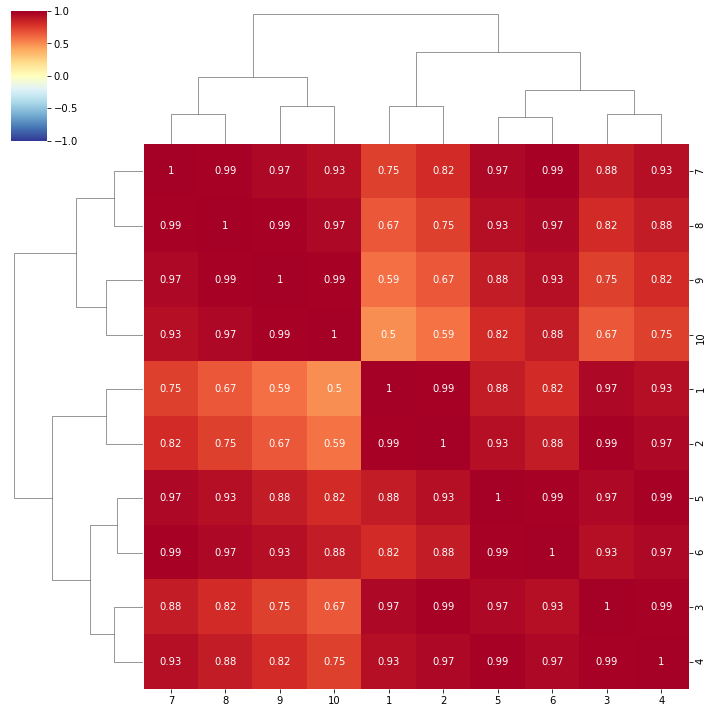

In [8]:
df = train_X1.corr()
sns.clustermap(df, annot = True, cmap = 'RdYlBu_r', vmin=-1, vmax=1)